In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  6 11:50:09 2018

@author: AndiGabi
"""


Machine Learning Problem Solving: 
Implementing Linear Regression with multiple varible

This exercise based on Andrew NG: Machine Learning Coursera week2 assignment, solved in MATLAB or OCTAVE.
Based on this exercise I made my solution completely in Python.

Suppose we are selling our house and we
want to know what a good market price would be. One way to do this is to

first collect information on recent houses sold and make a model of housing
prices.

Our dataset contains the size of the houses (sq feet), the number of bedrooms 
and the price the house sold.


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Load data from data2.txt file:

data=pd.read_csv("data2.txt", header = None)

X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_matrix = np.array(X)
y_vector = np.array(y).T
m = len(y)

#We can see, that our X variables are on completely different scale, which
#means, that we need to apply feature scaling.
#For this reason we use mean and std (standard deviation)
#The reason of feature scaling is to make our gradient descent much efficient.

def featureNorm(v, X=X_matrix):
    X_mean = X.mean(axis=0) #choose axis, which one to "eliminate" by calculating mean
    X_std = X.std(axis=0)
    X_norm = (v - X_mean) / X_std
    return X_norm

X_norm = featureNorm(X_matrix)    
m = X_norm.shape[0]
X_norm = np.hstack((np.ones((m,1)),X_norm)).T #number of rows should be the number of variables
n=X_norm.shape[0] #number of varibales



In [14]:
#Lets compute the cost for an initial theta values:
theta = np.zeros((1,n))

def computeCost(X, y, theta):
    m = len(y)
    h = theta.dot(X) #this is the matrix multiplication
    cost = ((h-y)**2).sum()/2/m
    return cost

cost = computeCost(X_norm, y_vector, theta)
print("In case of initial theta {1} the cost is {0:,.0f}.". format(cost, theta[0]))



In case of initial theta [ 0.  0.  0.] the cost is 3,082,802,761,004.


In [15]:
#Lets implement Gradient descent for multiple variables:

def gradientDescent(X, y, theta, alpha, max_iter=1500):
    m = len(y)
    cost = computeCost(X, y, theta)
    cost_history = [cost]
    i = 0
    while True:
        if i >= max_iter: break
        theta = theta - alpha * (1/m) * ( (theta.dot(X) - y)*X).sum(axis=1)
        cost_new = computeCost(X, y, theta)
        cost_history.append(cost_new)
        if cost - cost_new < 0.000001: break
        else: 
            cost = cost_new
            i +=1
    
    return theta, cost_history

#lets initialize parameters and calculate the optimum for theta
alpha = 0.01
theta = np.zeros((1,n))

theta, cost_history =  gradientDescent(X_norm, y_vector, theta, alpha)

print ("Gradient descent for normalized features resulted a theta of {} using alpha = {}.". format(theta[0], alpha))


Gradient descent for normalized features resulted a theta of [ 340412.65957447  109447.79516356   -6578.35354808] using alpha = 0.01.


Plotting the cost history


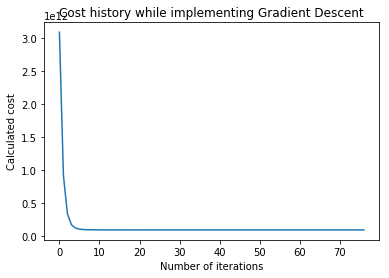

In [16]:
print("Plotting the cost history")
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Calculated cost")
plt.title("Cost history while implementing Gradient Descent")
plt.show()



In [17]:
#Lets estimate price for a 1650 sq feet big, 3 br house
p = np.array([1650, 3]).reshape(1,2)
p = featureNorm(p)
m = p.shape[0]
p = np.hstack((np.ones((m,1)),p)).T
price = theta @ p
print("The estimated price of the 1650 sq feet, 3 br house is ${:,.0f}.".format(price[0][0]))



The estimated price of the 1650 sq feet, 3 br house is $293,081.


In [18]:
#Normal equation:
m = X_matrix.shape[0]
X = np.hstack((np.ones((m,1)),X_matrix))
y_vector = y_vector.T
theta = np.linalg.inv(X.T@X) @ X.T @ y_vector
print ("Normal equation without feature normalization resulted a theta of {}.". format(theta.T[0]))



Normal equation without feature normalization resulted a theta of [ 89597.9095428     139.21067402  -8738.01911233].


In [19]:
#Lets calculate the price with theta from normal equation:
p = np.array([1650, 3]).reshape(1,2)
m = p.shape[0]
p = np.hstack((np.ones((m,1)),p)).T
price = theta.T @ p
print("The estimated price of the 1650 sq feet, 3 br house is ${:,.0f}.".format(price[0][0]))


The estimated price of the 1650 sq feet, 3 br house is $293,081.
